# The MNIST Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../Datasets/mnist_train.csv")  # Reading the Datasets

df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(60000, 785)

In [4]:
# Basically each row of dataframe df represents a label(1 col) and pixel value(784 col)

# Now to do manipulations on the data in dataset it is always prefered to convert the dataframe into a numpy array by using 'values' function.

In [24]:
data = df.values

np.random.shuffle(data)
print(data)

[[4 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]]


In [25]:
print(data.shape)

(60000, 785)


In [26]:
# Now we will be separating the data into Y:The label column(1D),X:The pixel values(2D)

X = data[:,1:]  # Each Row of X represents pixel values of corresponding label
Y = data[:,0]  # Each Row of Y represents the corresponding Label

print(X.shape,Y.shape)

(60000, 784) (60000,)


In [27]:
# Try To visualize one image  

# Note: the images in dataset are of single channel i.e gray therefore cmap="gray"

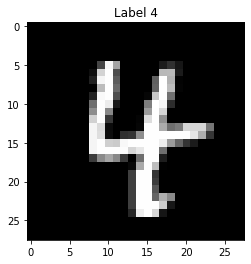

In [29]:
def drawImg(X,Y,i):
    plt.imshow(X[i].reshape(28,28),cmap="gray")  
    # reshape is imp because X[i] is a linear array and imshow plots in a 2D cartesian       planes
    plt.title("Label " + str(Y[i]))
    plt.show()

drawImg(X,Y,0)

*So we don't always work on the full dataset rather majority is used for training and minorities is used for testing and experimentation.*

**Therefore we need to split the dataset. It can be achieved in 2 ways:**
  - Manually by using slicing
  - By using inbuilt function in sklearn

### 1. Slicing

In [30]:
split = int(0.80*X.shape[0])  # We will be using 80% as training data

print(split)

48000


In [31]:
X_train,Y_train = X[:split,:],Y[:split]
X_test,Y_test = X[split:,:],Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [32]:
# So now Randomization in data is important because if the data would be ordered, Then there is a possibibility that some data is not present in testing at all during Slicing split

# For Example:
# let this be ordered data:
# 1
# 1
# 1
# 1
# 1
# 2
# 2
# 2
# 3
# 3
# 4
# 5
# 5
# 5

# So during the split it is possible that till 4 it goes in training and only 5 goes in testing.

In [33]:
# Now we will plot multiple images in a 5x5 grid

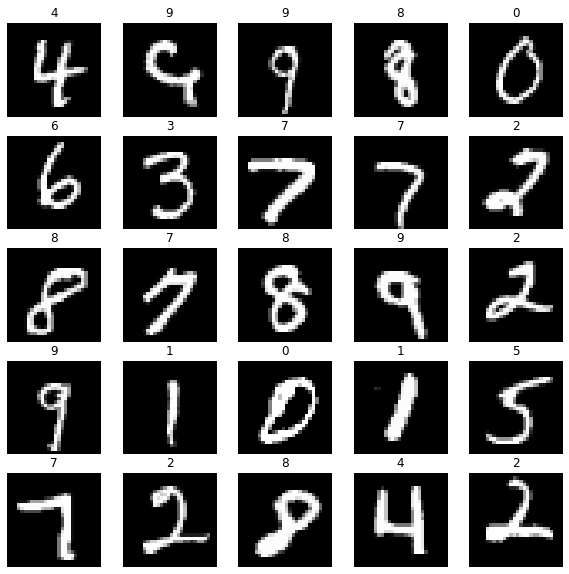

In [38]:
plt.figure(figsize=(10,10))  # sets a plot size
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.title(Y_train[i])
    plt.axis("off")

### 2. Sklearn

In [40]:
!pip install sklearn  # installs sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [41]:
from sklearn.model_selection import train_test_split  
# imports train_test_split method from sklearn's model selection

In [43]:
XT,Xt,YT,Yt = train_test_split(X,Y,test_size=0.2,random_state=2)  
# Splits automatically in specific order with given test_size(20% in this case)
# random_state is given to get a consistent dataset every time you run this cell. Just Like seed value

print(XT.shape,YT.shape)
print(Xt.shape,Yt.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)
